## Categorization of goods descriptions
We have set of goods description but we don't know to wich category it belong. 

Also we don't have markup of trainig set, so we try different approches for finding meaningful categories of goods.

https://blog.tensorflow.org/2019/05/auto-classification-of-naver-shopping.html

In [5]:
import pandas as pd

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/mrmopoz/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
from sklearn.model_selection import train_test_split

In [78]:
import  matplotlib.pyplot as plt

In [4]:
path = '../../data/7/goods_description.pckl'
data = pd.read_pickle(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   goods_name  1000000 non-null  object
 1   goods_url   1000000 non-null  object
dtypes: object(2)
memory usage: 15.3+ MB


In [8]:
data.head(5)

,goods_name,goods_url
0,17mm chrome car alloy wheel looking nut bolt c...,https://joom.com/products/1504168028812618290-...
1,bearings,http://www.aliexpress.com/item//32820266911.html
2,coins,https://joom.com/products/5d5baa1328fc7101019e...
3,phone case(hg0150a7),http://www.aliexpress.com/item//4000267904278....
4,screen protectors,http://www.aliexpress.com/item//4000581879117....


In [10]:
train, test = train_test_split(data, test_size=0.3)
print(train.shape)
print(test.shape)

(700000, 2)
(300000, 2)


### 1st approache

In [7]:
#create stemmer
stemmer = SnowballStemmer("english")

In [6]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [13]:
%%time
data['processed_discript'] = data['goods_name'].apply(preprocess)

CPU times: user 43.1 s, sys: 96.2 ms, total: 43.2 s
Wall time: 43.2 s


In [14]:
data.head()

,goods_name,goods_url,processed_discript
0,17mm chrome car alloy wheel looking nut bolt c...,https://joom.com/products/1504168028812618290-...,"[chrome, alloy, wheel, look, bolt, cover, golf..."
1,bearings,http://www.aliexpress.com/item//32820266911.html,[bear]
2,coins,https://joom.com/products/5d5baa1328fc7101019e...,[coin]
3,phone case(hg0150a7),http://www.aliexpress.com/item//4000267904278....,"[phone, case]"
4,screen protectors,http://www.aliexpress.com/item//4000581879117....,"[screen, protector]"


In [15]:
dictionary = gensim.corpora.Dictionary(data['processed_discript'].values)

In [16]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 alloy
1 bolt
2 chrome
3 cover
4 golf
5 look
6 passat
7 plastic
8 polo
9 wheel
10 bear


In [ ]:
# '''
# OPTIONAL STEP
# Remove very rare and very common words:

# - words appearing less than 15 times
# - words appearing in more than 10% of all documents
# '''
# dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [17]:
'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in data['processed_discript'].values]

In [23]:
'''
Preview BOW for our sample preprocessed document
'''
document_num = 9990
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 333 ("circuit") appears 1 time.
Word 334 ("integr") appears 1 time.


In [60]:

# LDA mono-core -- fallback code in case LdaMulticore throws an error on your machine
# lda_model = gensim.models.LdaModel(bow_corpus, 
#                                    num_topics = 10, 
#                                    id2word = dictionary,                                    
#                                    passes = 50)

# LDA multicore 
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 28, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [61]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.172*"necklac" + 0.142*"shirt" + 0.112*"jewelri" + 0.076*"charger" + 0.057*"pendant" + 0.051*"electron" + 0.040*"blous" + 0.036*"alloy" + 0.027*"pad" + 0.022*"toothbrush"


Topic: 1 
Words: 0.166*"black" + 0.059*"craft" + 0.051*"design" + 0.041*"cross" + 0.038*"aso" + 0.037*"stitch" + 0.033*"skirt" + 0.031*"leather" + 0.029*"fit" + 0.029*"boot"


Topic: 2 
Words: 0.147*"holder" + 0.068*"storag" + 0.062*"pant" + 0.060*"circuit" + 0.059*"set" + 0.057*"integr" + 0.040*"stand" + 0.037*"magnet" + 0.035*"charg" + 0.029*"cleaner"


Topic: 3 
Words: 0.196*"glass" + 0.070*"protect" + 0.062*"film" + 0.052*"temper" + 0.045*"huawei" + 0.040*"xiaomi" + 0.036*"camera" + 0.034*"samsung" + 0.033*"honor" + 0.030*"cover"


Topic: 4 
Words: 0.394*"screen" + 0.333*"protector" + 0.056*"glass" + 0.031*"rhineston" + 0.022*"handl" + 0.018*"film" + 0.018*"tank" + 0.014*"gel" + 0.008*"cami" + 0.008*"top"


Topic: 5 
Words: 0.070*"earring" + 0.054*"outdoor" + 0.053*"dangl" + 0.044*"drive" + 0.0

In [68]:
num = 999999
print(data['goods_name'].iloc[num])
print(data['goods_url'].iloc[num])

nail forms
https://joom.com/products/5ba1c0e28b2c3701527a83be


In [69]:
# Data preprocessing step for the unseen document
unseen_document = data['goods_name'].iloc[num]
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print(f"Score: {score:.4f}\t Topic {index}: {lda_model.print_topic(index, 4)}")

Score: 0.6786	 Topic 19: 0.331*"nail" + 0.070*"sticker" + 0.050*"tool" + 0.042*"polish"
Score: 0.0119	 Topic 0: 0.172*"necklac" + 0.142*"shirt" + 0.112*"jewelri" + 0.076*"charger"
Score: 0.0119	 Topic 1: 0.166*"black" + 0.059*"craft" + 0.051*"design" + 0.041*"cross"
Score: 0.0119	 Topic 2: 0.147*"holder" + 0.068*"storag" + 0.062*"pant" + 0.060*"circuit"
Score: 0.0119	 Topic 3: 0.196*"glass" + 0.070*"protect" + 0.062*"film" + 0.052*"temper"
Score: 0.0119	 Topic 4: 0.394*"screen" + 0.333*"protector" + 0.056*"glass" + 0.031*"rhineston"
Score: 0.0119	 Topic 5: 0.070*"earring" + 0.054*"outdoor" + 0.053*"dangl" + 0.044*"drive"
Score: 0.0119	 Topic 6: 0.157*"dress" + 0.120*"plastic" + 0.081*"part" + 0.064*"balloon"
Score: 0.0119	 Topic 7: 0.107*"earphon" + 0.103*"shoe" + 0.051*"sport" + 0.046*"headset"
Score: 0.0119	 Topic 8: 0.239*"cabl" + 0.101*"bracelet" + 0.061*"brush" + 0.049*"paint"
Score: 0.0119	 Topic 9: 0.127*"watch" + 0.091*"panti" + 0.085*"cloth" + 0.074*"sunglass"
Score: 0.0119	 T

In [70]:
def get_topic(model, dictionary, discription):
    bow_vector = dictionary.doc2bow(preprocess(discription))
    topic, score = sorted(model[bow_vector], key=lambda tup: -1*tup[1])[0]
    return topic, score

In [72]:
%%time
data[['topic', 'score']] = data['goods_name'].apply(lambda row: pd.Series(get_topic(lda_model, dictionary, row)))

CPU times: user 7min 43s, sys: 2.95 s, total: 7min 46s
Wall time: 7min 44s


In [73]:
data.head()

,goods_name,goods_url,processed_discript,topic,score
0,17mm chrome car alloy wheel looking nut bolt c...,https://joom.com/products/1504168028812618290-...,"[chrome, alloy, wheel, look, bolt, cover, golf...",2.0,0.303560
1,bearings,http://www.aliexpress.com/item//32820266911.html,[bear],25.0,0.517846
2,coins,https://joom.com/products/5d5baa1328fc7101019e...,[coin],15.0,0.517852
3,phone case(hg0150a7),http://www.aliexpress.com/item//4000267904278....,"[phone, case]",26.0,0.678571
4,screen protectors,http://www.aliexpress.com/item//4000581879117....,"[screen, protector]",4.0,0.678571


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   goods_name          1000000 non-null  object 
 1   goods_url           1000000 non-null  object 
 2   processed_discript  1000000 non-null  object 
 3   topic               1000000 non-null  float64
 4   score               1000000 non-null  float64
dtypes: float64(2), object(3)
memory usage: 38.1+ MB


<AxesSubplot:>

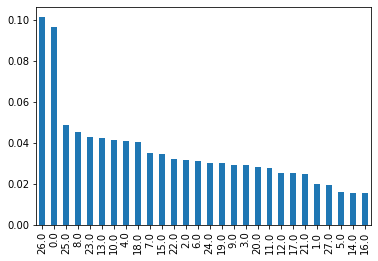

In [79]:
data['topic'].value_counts(normalize=True).plot(kind='bar')

In [82]:
_ = data[data['topic'] == 26]['goods_url'].sample(10).apply(print)

http://www.aliexpress.com/item//32949884026.html
http://www.aliexpress.com/item//4000777168907.html
http://www.aliexpress.com/item//4000266717438.html
http://www.aliexpress.com/item//4000238802777.html
http://www.aliexpress.com/item//32956485453.html
http://www.aliexpress.com/item//4000117654955.html
http://www.aliexpress.com/item//32851915380.html
http://www.aliexpress.com/item//32991581078.html
http://www.aliexpress.com/item//32990067865.html
http://www.aliexpress.com/item//1005001450597159.html


In [86]:
_ = data[data['topic'] == 0]['goods_url'].sample(10).apply(print)

http://www.aliexpress.com/item//4001144242966.html
http://www.aliexpress.com/item//4000495863187.html
http://www.aliexpress.com/item//4000083962920.html
http://www.aliexpress.com/item//32522322459.html
http://www.aliexpress.com/item//4000266144189.html
http://www.aliexpress.com/item//32892955088.html
http://www.aliexpress.com/item//4001196159983.html
http://www.aliexpress.com/item//33009870306.html
http://www.aliexpress.com/item//404.html
http://www.aliexpress.com/item//33032902811.html


In [88]:
data.to_pickle('../../data/7/goods_description_processed.pckl')